## Machine Learning I 
#### Team 2

In [1]:
#%matplotlib inline
#%pip install --upgrade scikit-learn
# Standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split  
from imblearn.over_sampling import SMOTE  # for oversampling
from imblearn.under_sampling import NearMiss # for undersampling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

### Diabetes Prediction EDA

In [2]:
# Load balanced dataset with 50% no diabetes and 50% prediabetic/diabetic
data = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
# View dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [4]:
# Summary statistics
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


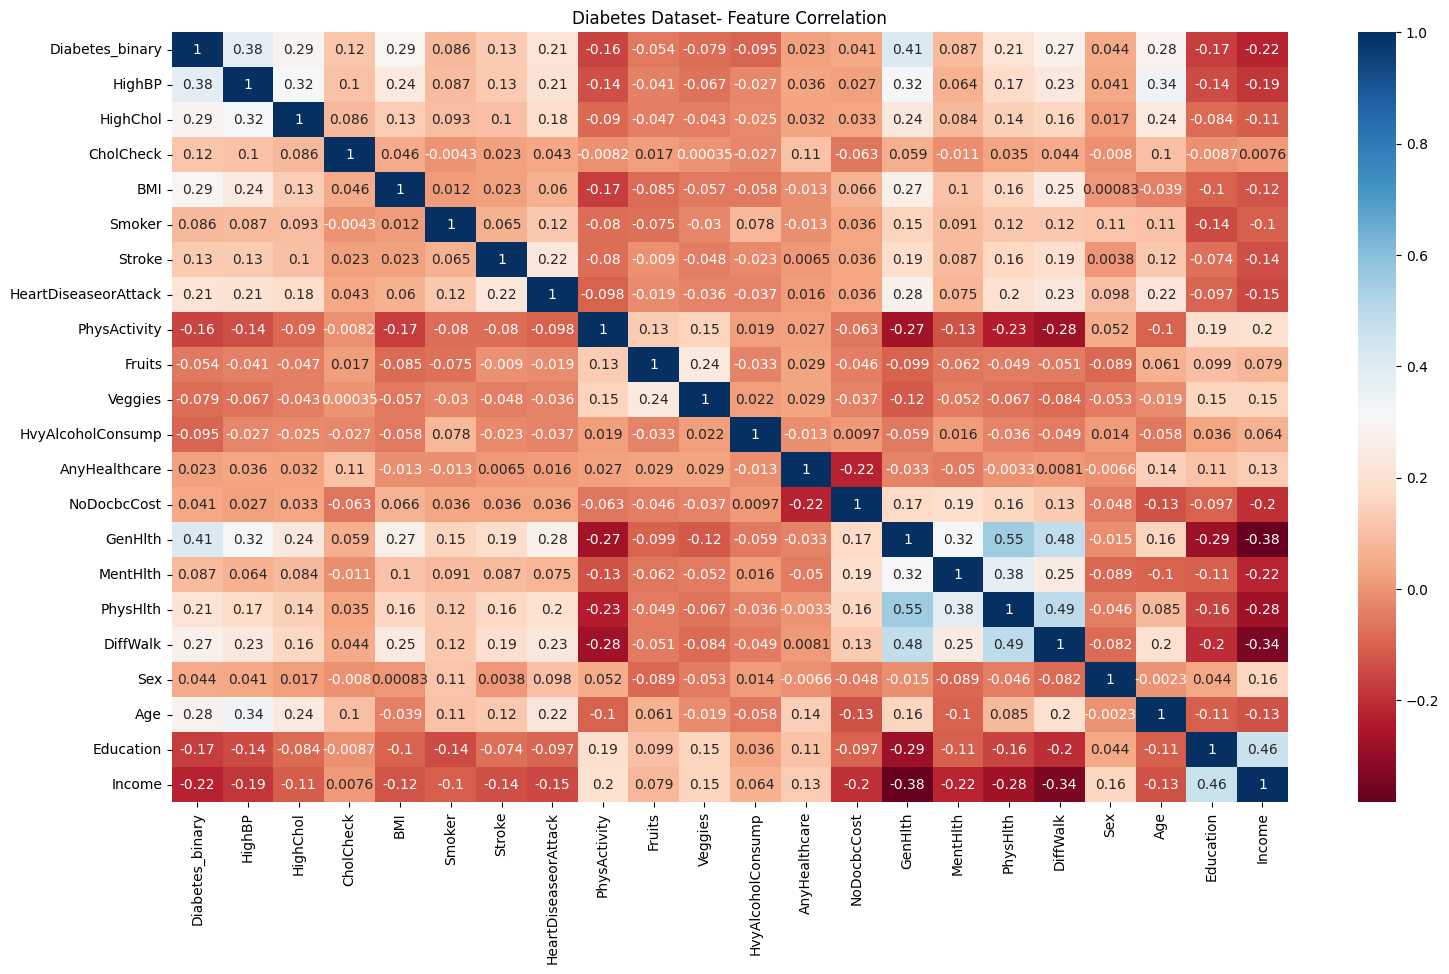

In [5]:
# Correlation heatmaps
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, cmap='RdBu')
plt.title("Diabetes Dataset- Feature Correlation")
plt.show()

In [6]:
# VIF Test
def calc_VIF(x):
    vif=pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i)for i in range(x.shape[1])]
    return(vif)
    
X=add_constant(data)
ds = pd.Series([variance_inflation_factor(X.values,i)
              for i in range(X.shape[1])],
               index = X.columns)
print(ds)

const                   128.848389
Diabetes_binary           1.448206
HighBP                    1.392152
HighChol                  1.196270
CholCheck                 1.036645
BMI                       1.221829
Smoker                    1.082185
Stroke                    1.094242
HeartDiseaseorAttack      1.195676
PhysActivity              1.167488
Fruits                    1.101370
Veggies                   1.103502
HvyAlcoholConsump         1.026415
AnyHealthcare             1.095647
NoDocbcCost               1.143394
GenHlth                   1.969881
MentHlth                  1.267448
PhysHlth                  1.701895
DiffWalk                  1.592094
Sex                       1.091814
Age                       1.365880
Education                 1.331998
Income                    1.547907
dtype: float64


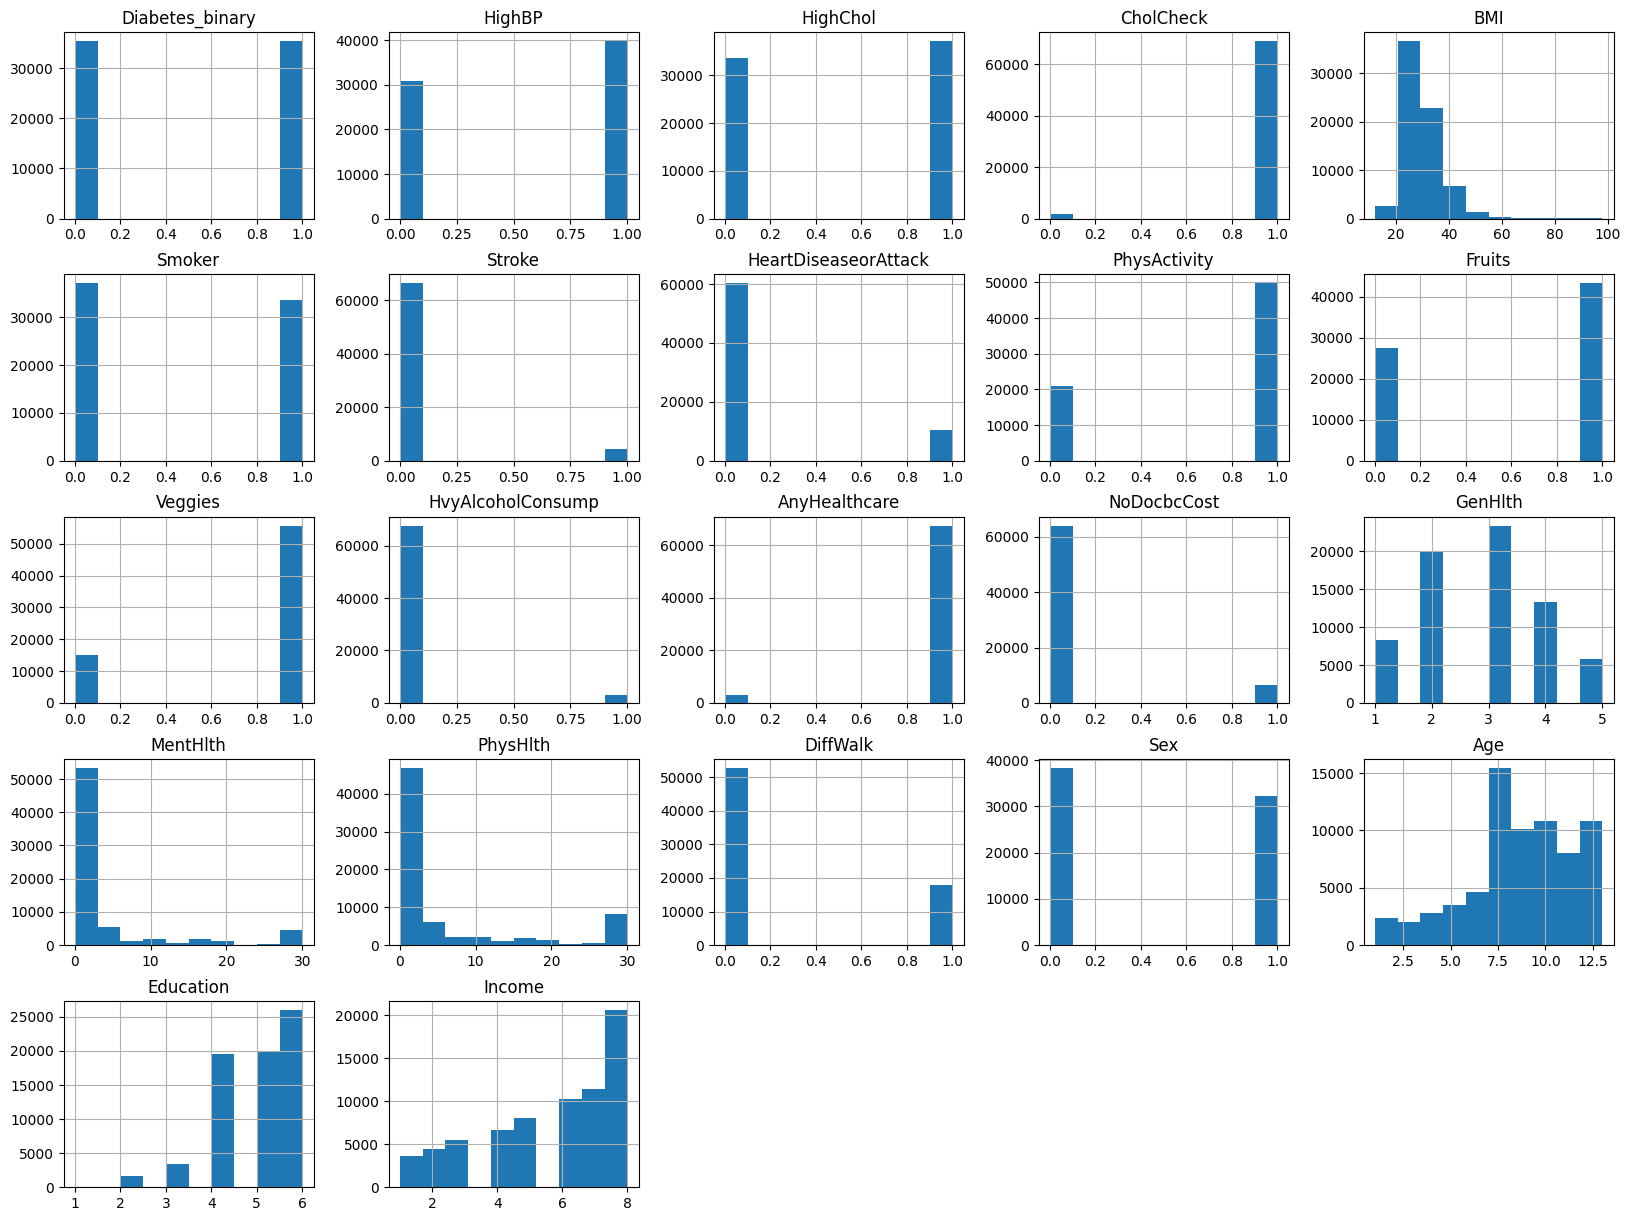

In [7]:
# Histograms for feature distributions
data.hist(figsize=(20, 15))
plt.show()

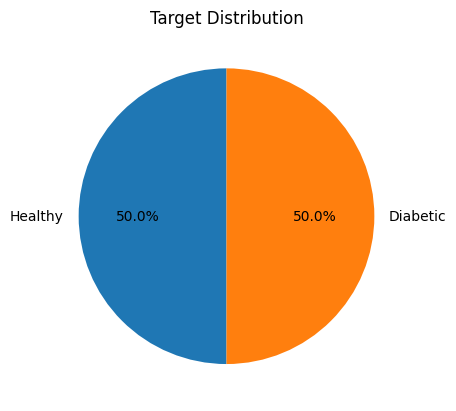

In [8]:
# Pie charts for target variable distribution
data.Diabetes_binary.value_counts().plot.pie(labels=['Healthy', 'Diabetic'], autopct='%1.1f%%', startangle=90)
plt.title("Target Distribution")
plt.ylabel('')  # Removed 'Count' label
plt.show()

In [9]:
# Remove Duplicates 
print("Duplicates in Diabetes Dataset", data.duplicated().sum())
data.drop_duplicates(inplace=True)

print("Duplicates after dropping:", data.duplicated().sum())

Duplicates in Diabetes Dataset 1635
Duplicates after dropping: 0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69057 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       69057 non-null  float64
 1   HighBP                69057 non-null  float64
 2   HighChol              69057 non-null  float64
 3   CholCheck             69057 non-null  float64
 4   BMI                   69057 non-null  float64
 5   Smoker                69057 non-null  float64
 6   Stroke                69057 non-null  float64
 7   HeartDiseaseorAttack  69057 non-null  float64
 8   PhysActivity          69057 non-null  float64
 9   Fruits                69057 non-null  float64
 10  Veggies               69057 non-null  float64
 11  HvyAlcoholConsump     69057 non-null  float64
 12  AnyHealthcare         69057 non-null  float64
 13  NoDocbcCost           69057 non-null  float64
 14  GenHlth               69057 non-null  float64
 15  MentHlth              69

In [11]:
print('\n=== Unique Value Overview ===')
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]
    
display(pd.DataFrame(unique_values, index=['Unique Value Count']).transpose())

print('\n=== Unique Value Detailed Overview ===')
for column in data.columns:
    print(f'\n{column}:')
    print(f'Unique Values:{sorted(data[column].unique())}')
    


=== Unique Value Overview ===


,Unique Value Count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2



=== Unique Value Detailed Overview ===

Diabetes_binary:
Unique Values:[np.float64(0.0), np.float64(1.0)]

HighBP:
Unique Values:[np.float64(0.0), np.float64(1.0)]

HighChol:
Unique Values:[np.float64(0.0), np.float64(1.0)]

CholCheck:
Unique Values:[np.float64(0.0), np.float64(1.0)]

BMI:
Unique Values:[np.float64(12.0), np.float64(13.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(18.0), np.float64(19.0), np.float64(20.0), np.float64(21.0), np.float64(22.0), np.float64(23.0), np.float64(24.0), np.float64(25.0), np.float64(26.0), np.float64(27.0), np.float64(28.0), np.float64(29.0), np.float64(30.0), np.float64(31.0), np.float64(32.0), np.float64(33.0), np.float64(34.0), np.float64(35.0), np.float64(36.0), np.float64(37.0), np.float64(38.0), np.float64(39.0), np.float64(40.0), np.float64(41.0), np.float64(42.0), np.float64(43.0), np.float64(44.0), np.float64(45.0), np.float64(46.0), np.float64(47.0), np.float64(48.0), np.float64(49.0), np.float6

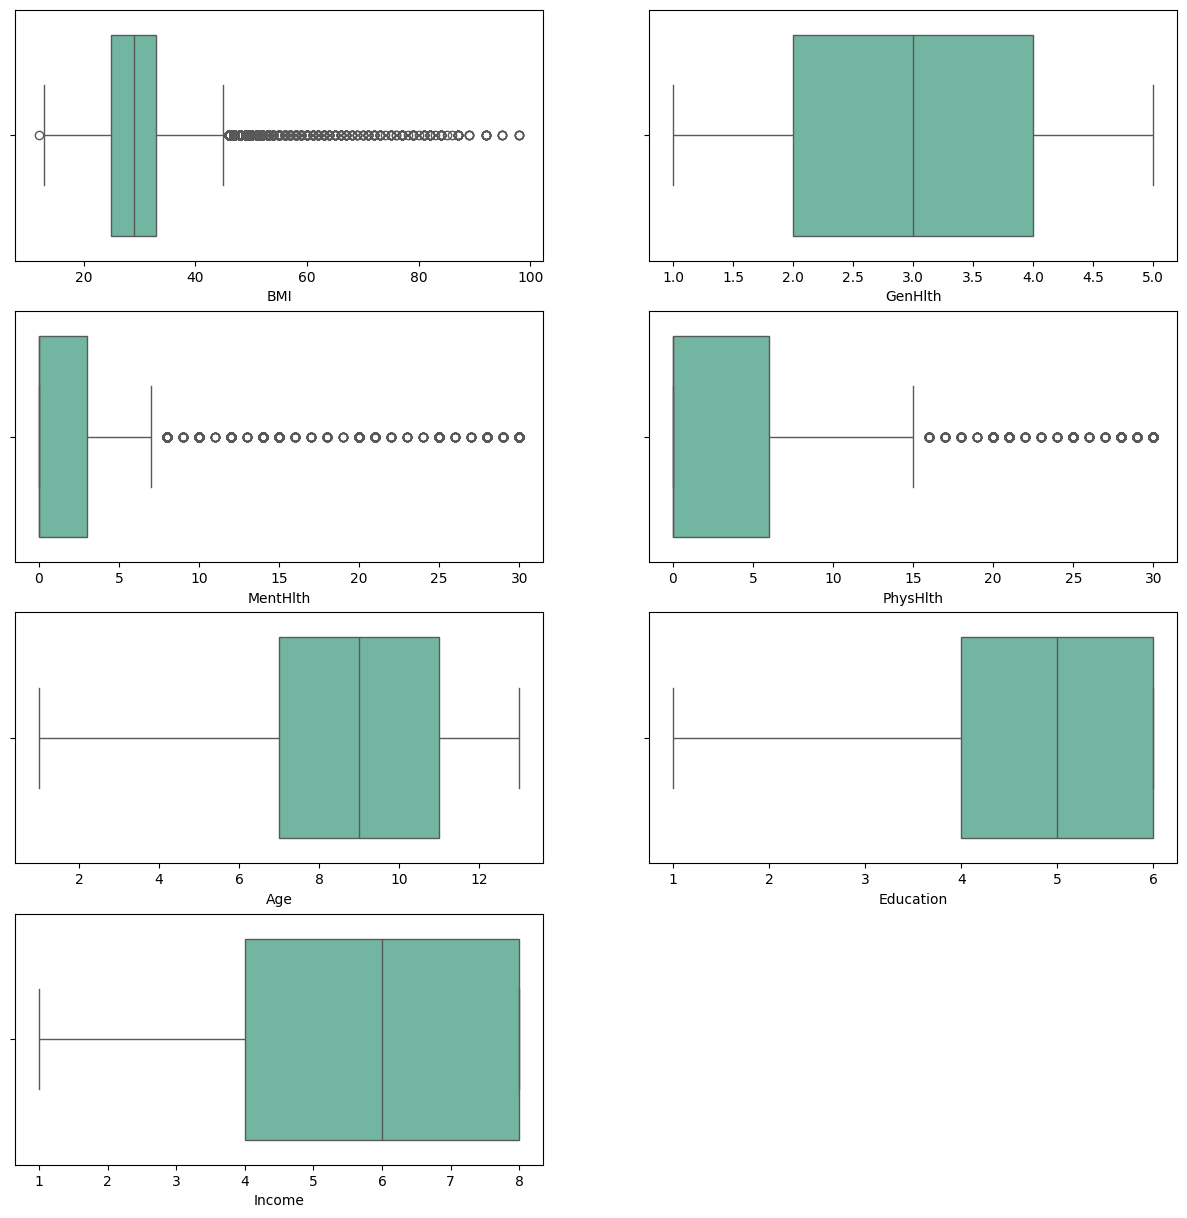

In [12]:
# Check for outlier
plt.figure(figsize = (15,15))
for i, col in enumerate (['BMI', 'GenHlth', 'MentHlth','PhysHlth','Age', 'Education','Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data, palette = 'Set2')
    
plt.show()

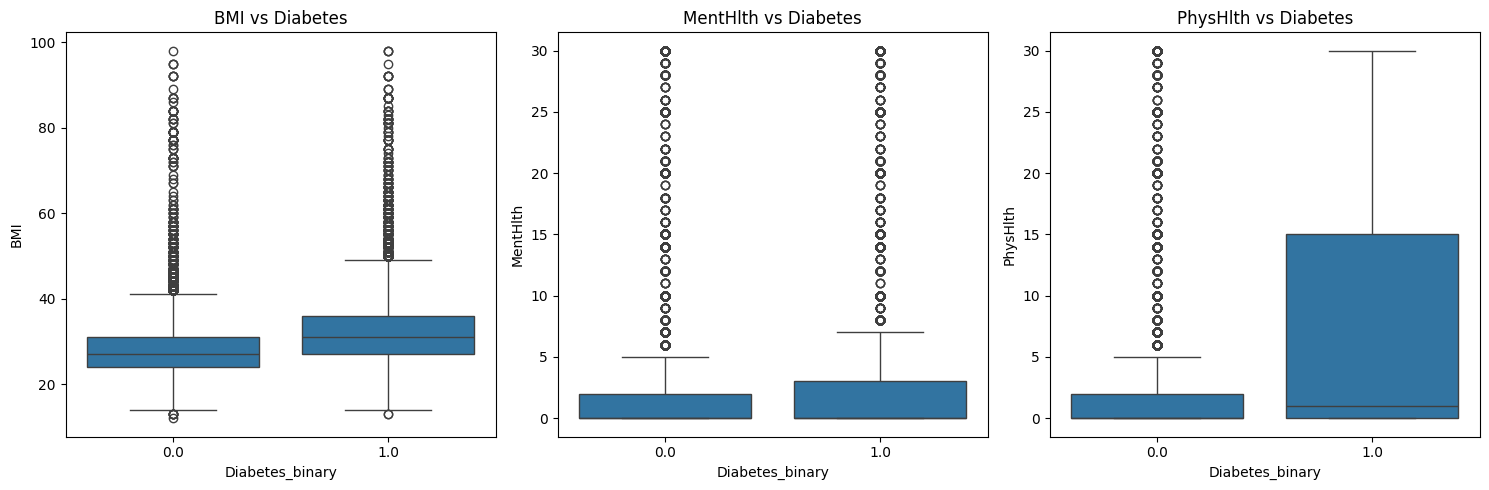

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for i, col in enumerate(["BMI", "MentHlth", "PhysHlth"]):
    sns.boxplot(x="Diabetes_binary", y=col, data=data, ax=axes[i])
    axes[i].set_title(f"{col} vs Diabetes")
plt.tight_layout()
plt.show()

In [14]:
# Categorizing BMI, MentHlth, and PhysHlth to reduce the impact of outliers
def categorize_bmi(BMI):
    if BMI < 18.5:
        return 1
    elif 18.5 <= BMI < 25:
        return 2
    elif 25 <= BMI < 30:
        return 3
    else:
        return 4

data["BMI_Category"] = data["BMI"].apply(categorize_bmi)

data["MentHlth_Category"] = pd.cut(data["MentHlth"], bins=[-1, 5, 15, 30], labels=[1, 2, 3]).astype(int)

data["PhysHlth_Category"] = pd.cut(data["PhysHlth"], bins=[-1, 5, 15, 30], labels=[1, 2, 3]).astype(int)

# Display sample
print(data[["BMI", "BMI_Category", "MentHlth", "MentHlth_Category", "PhysHlth", "PhysHlth_Category"]].head())

    BMI  BMI_Category  MentHlth  MentHlth_Category  PhysHlth  \
0  26.0             3       5.0                  1      30.0   
1  26.0             3       0.0                  1       0.0   
2  26.0             3       0.0                  1      10.0   
3  28.0             3       0.0                  1       3.0   
4  29.0             3       0.0                  1       0.0   

   PhysHlth_Category  
0                  3  
1                  1  
2                  2  
3                  1  
4                  1  


In [15]:
# delete original columns
data.drop(columns=["BMI", "MentHlth", "PhysHlth"], inplace=True)

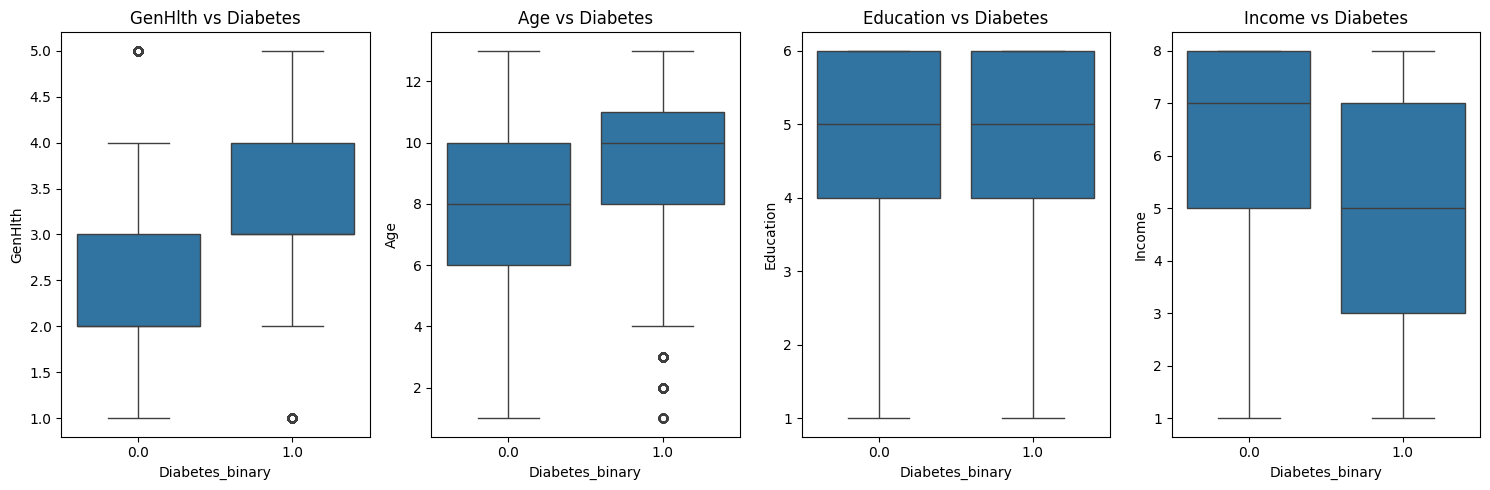

In [16]:
# Check the distribution of the other numerical columns
fig, axes = plt.subplots(1, 4, figsize=(15,5))
for i, col in enumerate(['GenHlth', 'Age', 'Education','Income']):
    sns.boxplot(x="Diabetes_binary", y=col, data=data, ax=axes[i])
    axes[i].set_title(f"{col} vs Diabetes")
plt.tight_layout()
plt.show()

### Model Training

In [17]:
# Split train and test set
X = data.drop('Diabetes_binary', axis = 1)
y = data['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [18]:
# fit a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      6723
         1.0       0.75      0.78      0.76      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812



In [19]:
# fit a support vector machine model
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73      6723
         1.0       0.73      0.83      0.78      7089

    accuracy                           0.76     13812
   macro avg       0.76      0.75      0.75     13812
weighted avg       0.76      0.76      0.75     13812



In [20]:
# fit a naive bayes model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      6723
         1.0       0.73      0.73      0.73      7089

    accuracy                           0.73     13812
   macro avg       0.73      0.73      0.73     13812
weighted avg       0.73      0.73      0.73     13812



In [21]:
# fit a decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.64      0.68      0.66      6723
         1.0       0.68      0.64      0.66      7089

    accuracy                           0.66     13812
   macro avg       0.66      0.66      0.66     13812
weighted avg       0.66      0.66      0.66     13812



In [22]:
# fit a random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.74      0.69      0.72      6723
         1.0       0.73      0.77      0.75      7089

    accuracy                           0.73     13812
   macro avg       0.73      0.73      0.73     13812
weighted avg       0.73      0.73      0.73     13812



In [23]:
# fit a gradient boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      6723
         1.0       0.74      0.80      0.77      7089

    accuracy                           0.76     13812
   macro avg       0.76      0.76      0.76     13812
weighted avg       0.76      0.76      0.76     13812



In [24]:
# fit a KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.71      0.68      0.69      6723
         1.0       0.71      0.73      0.72      7089

    accuracy                           0.71     13812
   macro avg       0.71      0.71      0.71     13812
weighted avg       0.71      0.71      0.71     13812



In [25]:
# fit a XGBoost model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.73      6723
         1.0       0.74      0.79      0.77      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812



### Hyperparameter Tuning for best models -- Gradient Boost and XGBoost

#### XGBoost

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': randint(50, 500),       # Number of trees
    'max_depth': randint(3, 15),            # Maximum tree depth
    'learning_rate': uniform(0.01, 0.3),    # Step size shrinkage
    'subsample': uniform(0.5, 0.5),         # Fraction of data per tree
    'colsample_bytree': uniform(0.5, 0.5),  # Fraction of features per tree
    'gamma': uniform(0, 5),                 # Minimum loss reduction required for a split
    'reg_alpha': uniform(0, 10),            # L1 regularization
    'reg_lambda': uniform(0, 10)            # L2 regularization
}
xgb_clf = XGBClassifier()

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=5, 
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters & score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Save the best model
best_xgb = random_search.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'colsample_bytree': np.float64(0.6709398333582008), 'gamma': np.float64(0.4589953290672094), 'learning_rate': np.float64(0.03824709648056803), 'max_depth': 6, 'n_estimators': 253, 'reg_alpha': np.float64(0.17161101831750236), 'reg_lambda': np.float64(7.63364423003911), 'subsample': np.float64(0.9034564885253897)}
Best Cross-Validation Accuracy: 0.7612325453355269


Best performance: XGBoost result from random search

In [37]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Initialize the model
xgb_model = xgb.XGBClassifier()

# Perform RFE with Cross-Validation to find the best number of features
rfecv = RFECV(
    estimator=xgb_model, 
    step=1,  # Remove one feature at a time
    cv=StratifiedKFold(5),  # 5-fold cross-validation
    scoring='f1',  # Change to 'accuracy' or 'roc_auc' if needed
    n_jobs=-1
)

# Fit RFE on the training data
rfecv.fit(X_train, y_train)

# Get the optimal number of features
optimal_features = rfecv.n_features_
print(f"Optimal number of features: {optimal_features}")

# Get the selected feature names
selected_features = X_train.columns[rfecv.support_].tolist()
print("Selected Features:", selected_features)

mean_test_scores = np.mean(rfecv.cv_results_['mean_test_score'], axis=0)

Optimal number of features: 9
Selected Features: ['HighBP', 'HighChol', 'CholCheck', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'BMI_Category']


In [38]:
# Reduce dataset to RFECV-selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(f"Training with {len(selected_features)} selected features: {selected_features}")

Training with 9 selected features: ['HighBP', 'HighChol', 'CholCheck', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'BMI_Category']


In [41]:
# Retrain the model with selected features
best_xgb_selected = random_search.best_estimator_

best_xgb_selected.fit(X_train_selected, y_train)

# Predict on test data
y_pred_xgb_selected = best_xgb_selected.predict(X_test_selected)

# Evaluate performance
print("XGBoost Model with RFECV-Selected Features:")
print(classification_report(y_test, y_pred_xgb_selected))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_selected))

XGBoost Model with RFECV-Selected Features:
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      6723
         1.0       0.74      0.81      0.77      7089

    accuracy                           0.76     13812
   macro avg       0.76      0.75      0.75     13812
weighted avg       0.76      0.76      0.75     13812

Accuracy: 0.755285259194903


Selecting features gives lower accuracy. We'll retain all the features.

In [28]:
from sklearn.model_selection import GridSearchCV

# Define a smaller refined grid
param_grid = {
    'colsample_bytree': [0.65, 0.70],  
    'gamma': [0.4, 0.5], 
    'learning_rate': [0.03, 0.04], 
    'max_depth': [5, 6],  
    'n_estimators': [200, 250], 
    'subsample': [0.85, 0.90], 
}

# Initialize the XGBoost model
xgb_model = XGBClassifier()

# Grid Search with fewer combinations
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',  # Use 'accuracy' or 'roc_auc' if needed
    cv=3,  # Reduce to 3-fold cross-validation for efficiency
    verbose=1,
    n_jobs=-1
)

# Fit the search
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Grid Search F1 Score:", grid_search.best_score_)

# Save best model
best_xgb = grid_search.best_estimator_

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Hyperparameters: {'colsample_bytree': 0.65, 'gamma': 0.4, 'learning_rate': 0.04, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.85}
Best Grid Search F1 Score: 0.7603761375691779


Grid search based on random search also gives a lower accuracy score.

#### Gradient Boost

In [29]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Define the Gradient Boosting model
gb = GradientBoostingClassifier()


# Define the optimized hyperparameter grid
param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 0.9],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}
scoring = {
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

# Perform Grid Search with multiple scoring metrics
grid_search = GridSearchCV(
    gb, param_grid, cv=3, scoring=scoring, verbose=2, n_jobs=-1, refit='f1'
)

# Fit the model on training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=0.8; total time= 

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 300], 'subsample': [0.8, 0.9]},
             refit='f1',
             scoring={'f1': make_scorer(f1_score, response_method='predict', average=binary),
                      'precision': make_scorer(precision_score, response_method='predict', average=binary),
                      'recall': make_scorer(recall_score, response_method='predict', average=binary)},
             verbose=2)

In [30]:
# Extract best parameters
best_params = grid_search.best_params_

# Extract scores for best model
best_index = grid_search.best_index_
best_precision = grid_search.cv_results_['mean_test_precision'][best_index]
best_recall = grid_search.cv_results_['mean_test_recall'][best_index]
best_f1 = grid_search.cv_results_['mean_test_f1'][best_index]

# Print best parameters and scores
print("Best Parameters:", best_params)
print(f"Best Precision: {best_precision:.4f}")
print(f"Best Recall: {best_recall:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}
Best Precision: 0.7273
Best Recall: 0.7963
Best F1 Score: 0.7602


### Use SHAP to interpret the variables

 98%|===================| 13546/13812 [00:43<00:00]        

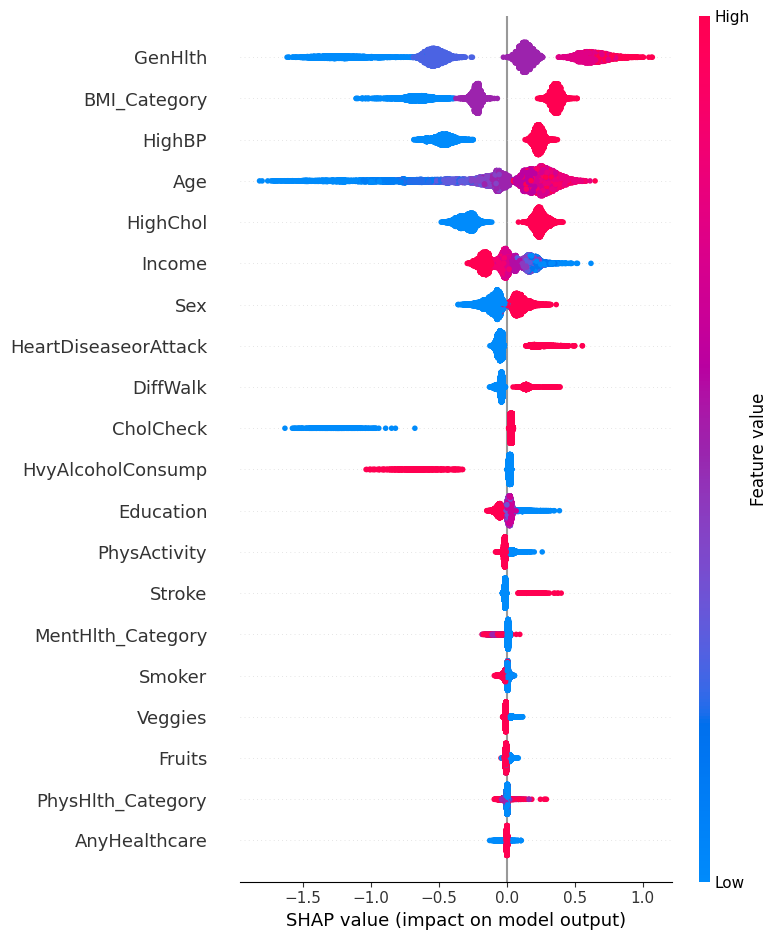

In [31]:
import shap
# Initialize SHAP explainer
explainer = shap.Explainer(best_xgb, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Summary plot to show overall feature importance
shap.summary_plot(shap_values, X_test)